<a href="https://colab.research.google.com/github/Sandesh-Jadhao/LGMVIP-DataScience/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> AUTHOR- **Sandesh Jadhao**

**TASK 1-IRIS FLOWER CLASSIFICATION ML PROJECT**

DATA SET-http://archive.ics.uci.edu/ml/datasets/Iris

**IMPORTING LIBRARIES:**

---





In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics


**READING THE DATA SET**

In [10]:
header = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names = header)
print(data)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


**EXPLORING THE DATASET**

In [11]:
data.shape

(150, 5)

In [12]:
data.head(6)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**CHECKING THE NULL VALUES**

In [15]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

**VISUALIZING THE DATASET**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


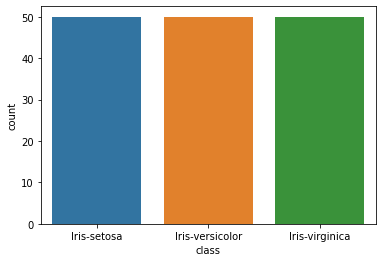

In [16]:
import seaborn as sns
sns.countplot(data['class'],label="Size")
plt.show()

**USING KMeans CLUSTERING AND ELBOW METHOD TO KNOW THE NUMBER OF OPTIMUM CLUSTERS**

In [17]:
from sklearn.cluster import KMeans
ic = []
for i in range(1,10):
    kmeans = KMeans( n_jobs=-1,n_clusters = i, init='k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    ic.append(kmeans.inertia_)

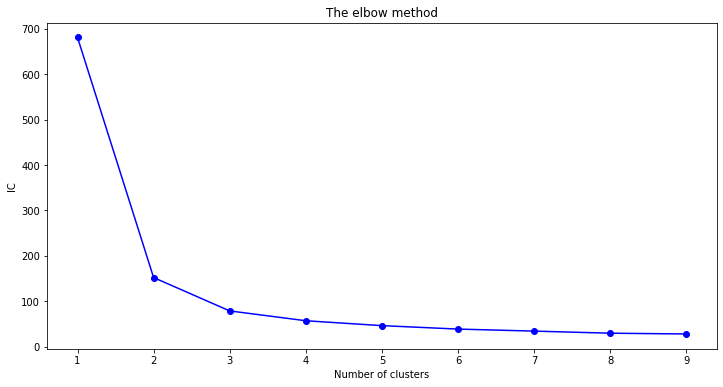

In [18]:

df = pd.DataFrame({'Cluster':range(1,10), 'ic':ic})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['ic'], marker='o',color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('IC')#In cluster range
plt.title('The elbow method')
plt.show()

**VISUALIZING THE CLUSTER**

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(data.iloc[:, [0, 1, 2, 3]].values)

**Visualizing Centroids on the Clusters of Columns SepalLength and SepalWidth**

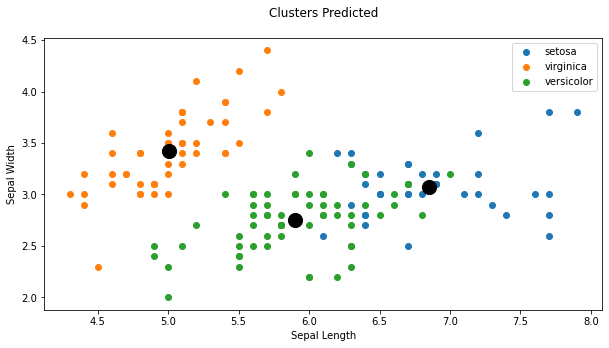

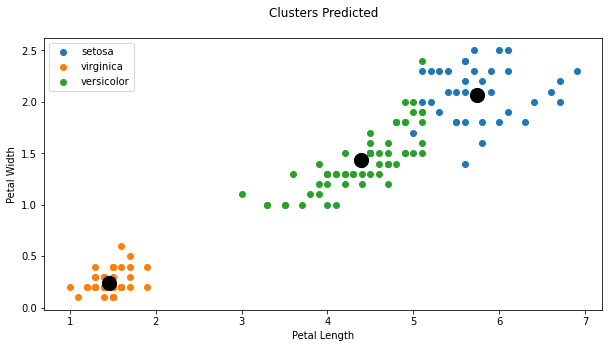

In [20]:
x = data.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],label='setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],label='virginica')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],label='versicolor')
plt.legend()
plt.title('Clusters Predicted\n')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='black', label = 'Centroids')
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],label='setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],label='virginica')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],label='versicolor')
plt.legend()
plt.title('Clusters Predicted\n')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3] ,  s=200, c='black', label = 'Centroids')
plt.show()

**CORRELATION MATRIX**

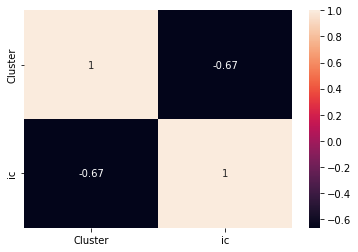

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()

**GAUSSIAN NAIVE BAYES ACCURACY CHECK**

In [22]:
x_data=data.reindex(columns=["sepal length", "sepal width", "petal length", "petal width"])
x_train, x_test, y_train, y_test = train_test_split(x_data, data["class"], test_size=0.3, random_state=42)

In [23]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of Gaussian Naive Bayes classifier on training set: 0.94
Accuracy of Gaussian Naive Bayes classifier on test set: 0.98
